Problem Statement: 

Perform hierarchical and K-means clustering on the dataset. After that, perform PCA on the dataset and extract the first 3 principal components and make a new dataset with these 3 principal components as the columns. Now, on this new dataset, perform hierarchical and K-means clustering. Compare the results of clustering on the original dataset and clustering on the principal components dataset (use the scree plot technique to obtain the optimum number of clusters in K-means clustering and check if you’re getting similar results with and without PCA).


--------------------------------------------------------------------------------------------------------------------------------------------------------
Business Objective :

Customer Segmentation: Identify clusters of wines based on their chemical properties and characteristics, which can help in segmenting wines into different quality categories or types.

Improved Marketing and Sales Strategy: Use clustering to understand which wines share similar characteristics, enabling targeted marketing efforts, promotions, and product recommendations to different customer groups.

Product Development: The results can help winemakers fine-tune their product lines by understanding which characteristics or features are most dominant across clusters of wines.

Optimization of Wine Selection: For retail or distribution, clustering helps in streamlining inventory by focusing on popular or high-demand clusters of wine based on their quality or preferences.

--------------------------------------------------------------------------------------------------------------------------------------------------------
Contraints :

Data Quality: The analysis depends on the quality of the dataset. If the data has missing values, outliers, or inaccuracies, the clustering results may be unreliable.

Dimensionality: High-dimensional data can make clustering and PCA results complex and computationally expensive, which is why dimensionality reduction (via PCA) is necessary.

Interpreting Results: Clustering algorithms may produce different results depending on the choice of distance measures and algorithm parameters, which may complicate interpretation.

Optimal Cluster Number: Determining the optimal number of clusters is a challenge and may vary with different methods, such as the scree plot in K-means clustering.

Computational Resources: Large datasets can be computationally expensive for both PCA and clustering algorithms, especially with hierarchical clustering, which may limit the size of the dataset that can be analyzed efficiently.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv("wine.csv")
data.head()


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [74]:
#Check the shape of dataframe
data.shape

(178, 14)

In [13]:
#check columns in the data
data.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

<Axes: >

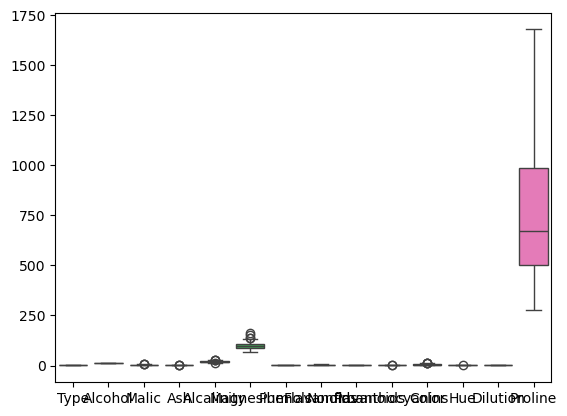

In [58]:
sns.boxplot(data)
#from here we can see that some of the columns contain otliers now we will remove that otliers using iqr method

In [62]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

# Detecting outliers in multiple columns
outliers = detect_outliers_iqr(data)

# Remove rows where any column has an outlier
df_cleaned = data[~outliers.any(axis=1)]

<Axes: >

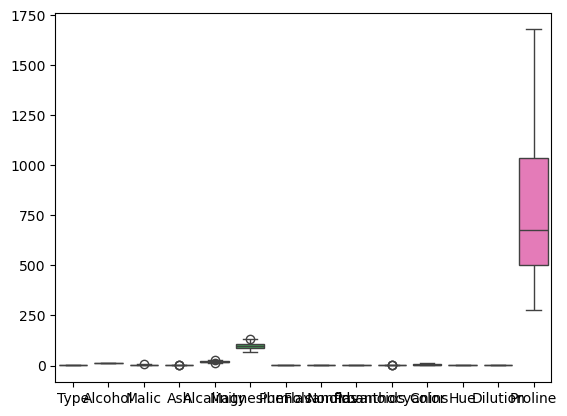

In [70]:
sns.boxplot(df_cleaned)

In [72]:
#Now we will go for EDA
df_cleaned.shape

(161, 14)

In [76]:
#first we will check summary of data
df_cleaned.describe()   

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,1.900621,13.040373,2.306832,2.363292,19.232298,98.534161,2.290373,2.043789,0.358137,1.548075,5.014161,0.959106,2.628820,759.111801
std,0.784259,0.797841,1.048263,0.241205,3.014706,12.365290,0.632366,0.985649,0.121810,0.525859,2.117379,0.218049,0.709052,323.866465
min,1.000000,11.410000,0.740000,1.700000,11.200000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.540000,1.270000,278.000000
25%,1.000000,12.370000,1.610000,2.230000,17.100000,88.000000,1.720000,1.220000,0.270000,1.240000,3.270000,0.790000,2.010000,502.000000
50%,2.000000,13.070000,1.860000,2.360000,19.000000,98.000000,2.350000,2.140000,0.340000,1.530000,4.800000,0.980000,2.780000,675.000000
75%,3.000000,13.710000,3.030000,2.530000,21.000000,106.000000,2.800000,2.910000,0.430000,1.870000,6.200000,1.120000,3.180000,1035.000000
max,3.000000,14.830000,5.190000,2.920000,27.000000,134.000000,3.880000,3.930000,0.660000,2.960000,10.520000,1.450000,4.000000,1680.000000


In [78]:
df_cleaned.info()  #from info() weget all the information regarding to the data

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             161 non-null    int64  
 1   Alcohol          161 non-null    float64
 2   Malic            161 non-null    float64
 3   Ash              161 non-null    float64
 4   Alcalinity       161 non-null    float64
 5   Magnesium        161 non-null    int64  
 6   Phenols          161 non-null    float64
 7   Flavanoids       161 non-null    float64
 8   Nonflavanoids    161 non-null    float64
 9   Proanthocyanins  161 non-null    float64
 10  Color            161 non-null    float64
 11  Hue              161 non-null    float64
 12  Dilution         161 non-null    float64
 13  Proline          161 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 18.9 KB


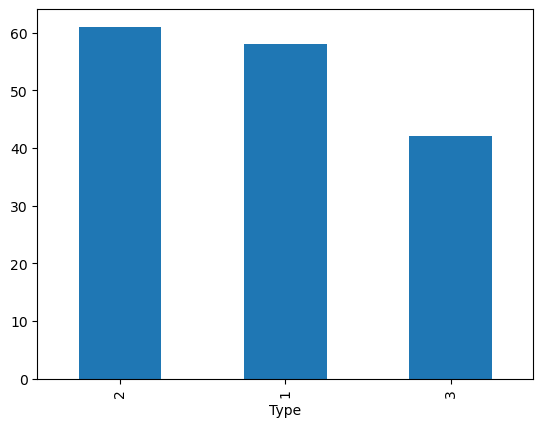

In [93]:
#Now Univariete Analysis
#for Type
df_cleaned['Type'].value_counts().plot(kind='bar')
plt.show()


In [95]:
#normalize the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_cleaned)

In [97]:
df_scaled=pd.DataFrame(df_scaled, columns=df_cleaned.columns)

K-Means Clustering

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'KMeans Clustering (Alcohol vs Malic)')

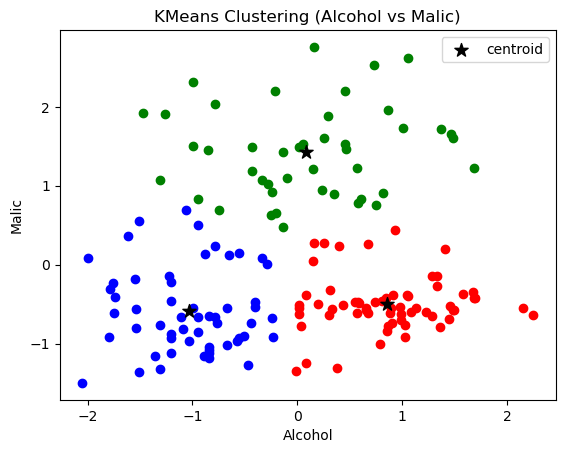

In [127]:
#K-Means Clustering

km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df_scaled[['Alcohol','Malic']])
y_predicted

# Get cluster centers (centroids)
centroids = km.cluster_centers_

#create dataframe for diffrent clusters
df_c1=df_scaled[y_predicted==0]
df_c2=df_scaled[y_predicted==1]
df_c3=df_scaled[y_predicted==2]

#plot the clusters with centroid
plt.scatter(df_c1.Alcohol,df_c1['Malic'],color='green')
plt.scatter(df_c2.Alcohol,df_c2['Malic'],color='blue')
plt.scatter(df_c3.Alcohol,df_c3['Malic'],color='red')
#Now define centri]oid position
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',s=100,label='centroid')
#plot
plt.xlabel('Alcohol')
plt.ylabel('Malic')
plt.legend()
plt.title("KMeans Clustering (Alcohol vs Malic)")


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'KMeans Clustering (Color vs Hue)')

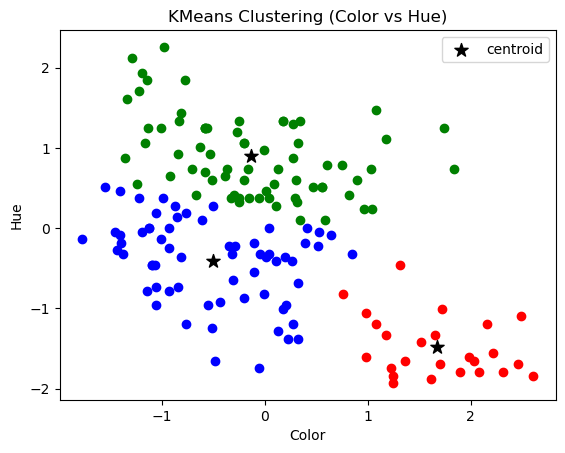

In [129]:
#K-Means Clustering on color and hue 

km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df_scaled[['Color','Hue']])
y_predicted

# Get cluster centers (centroids)
centroids = km.cluster_centers_

#create dataframe for diffrent clusters
df_c1=df_scaled[y_predicted==0]
df_c2=df_scaled[y_predicted==1]
df_c3=df_scaled[y_predicted==2]

#plot the clusters with centroid
plt.scatter(df_c1.Color,df_c1['Hue'],color='green')
plt.scatter(df_c2.Color,df_c2['Hue'],color='blue')
plt.scatter(df_c3.Color,df_c3['Hue'],color='red')
#Now define centroid position
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',s=100,label='centroid')
#plot
plt.xlabel('Color')
plt.ylabel('Hue')
plt.legend()
plt.title("KMeans Clustering (Color vs Hue)")


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'KMeans Clustering (Flavanoids vs Nonflavanoids)')

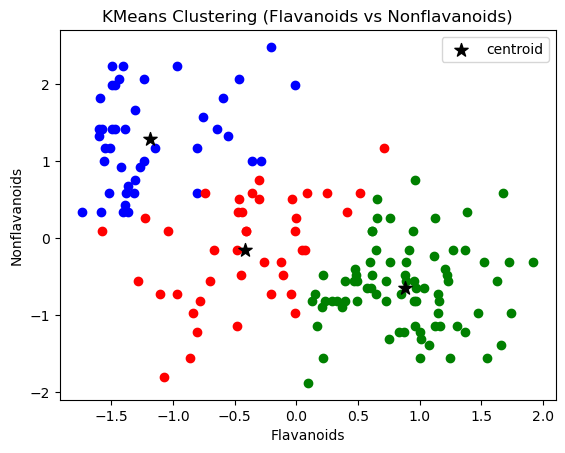

In [141]:
#K-Means Flavanoids	and Nonflavanoids
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df_scaled[["Flavanoids","Nonflavanoids"]])
y_predicted

#Get clyster centers
centroids=km.cluster_centers_

#Create Dataframe
df_c1=df_scaled[y_predicted==0]
df_c2=df_scaled[y_predicted==1]
df_c3=df_scaled[y_predicted==2]

#Now plot the graph
plt.scatter(df_c1.Flavanoids,df_c1["Nonflavanoids"],color='green')
plt.scatter(df_c2.Flavanoids,df_c2["Nonflavanoids"],color='blue')
plt.scatter(df_c3.Flavanoids,df_c3["Nonflavanoids"],color='red')

#Now define centroid position
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',s=100,label='centroid')
#plot
plt.xlabel('Flavanoids')
plt.ylabel('Nonflavanoids')
plt.legend()
plt.title("KMeans Clustering (Flavanoids vs Nonflavanoids)")

Principal Component Analysis


In [156]:
pca=PCA(n_components=3)
pca_values=pca.fit_transform(df_scaled)
pca_values

#create Datframe
pca_df=pd.DataFrame(data=pca_values,columns=['PC1','PC2','PC3'])

#Print explained variance ratio
print("Explained Variance Ratio :",pca.explained_variance_ratio_)

Explained Variance Ratio : [0.42160037 0.19030146 0.08887718]


In [158]:
pca_df.head()

,PC1,PC2,PC3
0,3.651576,1.522429,0.102933
1,2.552097,-0.362780,-1.858231
2,2.852966,0.870372,1.073678
3,4.044034,2.628303,-0.134735
4,1.379702,1.005934,2.525634


Perform KMeans on PC1 , PC2 , PC3

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


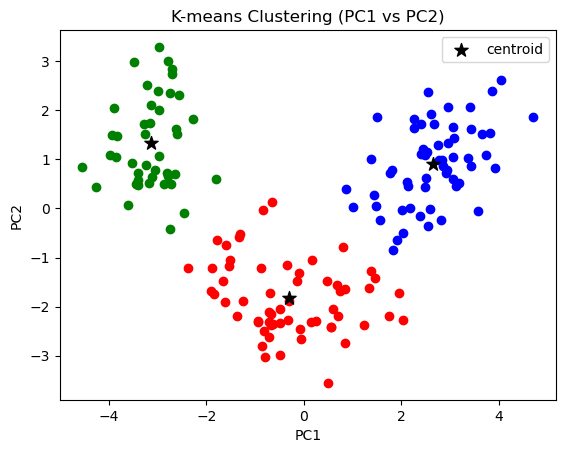

In [171]:
#First we will perform kmeans clustering on pc1 and pc2
km=KMeans(n_clusters=3)
y_predict=km.fit_predict(pca_df[["PC1","PC2"]])
y_predict

#defining the centroids
centroid=km.cluster_centers_

#Creating dataframe for 3 clusters
df_pc1=pca_df[y_predict==0]
df_pc2=pca_df[y_predict==1]
df_pc3=pca_df[y_predict==2]

#PLoting
plt.scatter(df_pc1.PC1,df_pc1["PC2"],color="green")
plt.scatter(df_pc2.PC1,df_pc2["PC2"],color="blue")
plt.scatter(df_pc3.PC1,df_pc3["PC2"],color="red")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',s=100,label='centroid')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering (PC1 vs PC2)')
plt.legend()
plt.show()

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


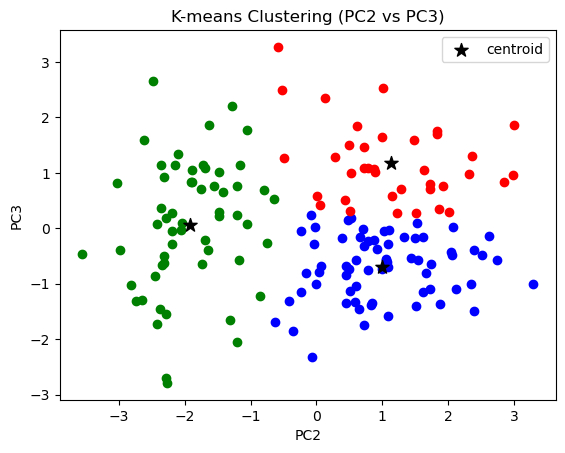

In [173]:
#First we will perform kmeans clustering on pc2 and pc3
km=KMeans(n_clusters=3)
y_predict=km.fit_predict(pca_df[["PC2","PC3"]])
y_predict

#defining the centroids
centroid=km.cluster_centers_

#Creating dataframe for 3 clusters
df_pc1=pca_df[y_predict==0]
df_pc2=pca_df[y_predict==1]
df_pc3=pca_df[y_predict==2]

#PLoting
plt.scatter(df_pc1.PC2,df_pc1["PC3"],color="green")
plt.scatter(df_pc2.PC2,df_pc2["PC3"],color="blue")
plt.scatter(df_pc3.PC2,df_pc3["PC3"],color="red")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',s=100,label='centroid')

plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('K-means Clustering (PC2 vs PC3)')
plt.legend()
plt.show()

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


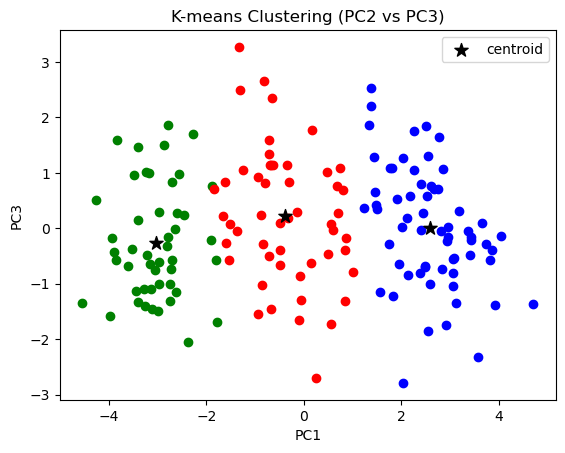

In [177]:
#First we will perform kmeans clustering on pc1 and pc3
km=KMeans(n_clusters=3)
y_predict=km.fit_predict(pca_df[["PC1","PC3"]])
y_predict

#defining the centroids
centroid=km.cluster_centers_

#Creating dataframe for 3 clusters
df_pc1=pca_df[y_predict==0]
df_pc2=pca_df[y_predict==1]
df_pc3=pca_df[y_predict==2]

#PLoting
plt.scatter(df_pc1.PC1,df_pc1["PC3"],color="green")
plt.scatter(df_pc2.PC1,df_pc2["PC3"],color="blue")
plt.scatter(df_pc3.PC1,df_pc3["PC3"],color="red")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',s=100,label='centroid')

plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('K-means Clustering (PC2 vs PC3)')
plt.legend()
plt.show()

The solution of applying clustering and PCA on the wine dataset provides the business with valuable insights for better wine categorization, enabling targeted marketing strategies and improved product offerings. Clustering helps identify customer segments and preferences, allowing for data-driven decisions in marketing and inventory management. PCA simplifies the data by focusing on the most important factors, enhancing the clarity of the analysis. Ultimately, the business benefits from optimized resources, increased sales, and a competitive edge through data-driven insights.